In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data skripsi.xlsx to data skripsi.xlsx


In [ ]:
data = pd.read_excel('data skripsi.xlsx')

In [ ]:
data.head()

,No,Nama Laptop,Merek,Harga,Prosesor,RAM,SSD,HDD,Layar,Sistem
0,1,Acer Aspire 3 Slim (A314-35-C8QL),Acer,5099000,Intel Celeron,4,256,0,14.0,Win 10 Home
1,2,Acer Aspire 5 (A514-54-33WF) Win 10,Acer,7200000,Intel Core i3,4,512,0,14.0,Win 10 Home
2,3,Asus M415DAO-VIPS351/VIPS352,Asus,7699000,AMD Ryzen 3,8,512,0,14.0,Win 10 Home
3,4,Asus TUF Gaming A15 FA506IC-R735B6T-O,Asus,15097000,AMD Ryzen 7,8,512,0,15.6,Win 10 Home
4,5,Asus VivoBook K513EA-OLED521/OLED522/OLED523/O...,Asus,10199000,Intel Core i5,8,256,0,15.6,Win 10 Home


In [ ]:
X = data.drop(['Harga','No','Nama Laptop'], axis=1)
y = data['Harga']

In [ ]:
category_col = ['Merek','Prosesor','RAM','Sistem']
labelEncoder = LabelEncoder()

In [ ]:
mapping_dict={}
for col in category_col:
  data[col] = labelEncoder.fit_transform(data[col])
  le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
  mapping_dict[col] = le_name_mapping
print(mapping_dict)

{'Merek': {'Acer': 0, 'Apple': 1, 'Asus': 2, 'Axioo': 3, 'Dell': 4, 'HP': 5, 'Huawei': 6, 'Infinix': 7, 'Lenovo': 8, 'MSI': 9, 'Microsoft': 10, 'Xiaomi': 11}, 'Prosesor': {'AMD Athlon': 0, 'AMD Ryzen 3': 1, 'AMD Ryzen 5': 2, 'AMD Ryzen 7': 3, 'AMD Ryzen 9': 4, 'Apple M1': 5, 'Intel Celeron': 6, 'Intel Core i3': 7, 'Intel Core i5': 8, 'Intel Core i7': 9, 'Intel Core i9': 10, 'Intel Pentium': 11, 'Intel Xeon': 12}, 'RAM': {4: 0, 6: 1, 8: 2, 16: 3, 32: 4, 64: 5}, 'Sistem': {'Chrome OS': 0, 'DOS': 1, 'Linux': 2, 'MacOS': 3, 'Win 10 Home': 4, 'Win 10 Pro': 5, 'Win 11 Home': 6, 'Win 11 Pro': 7}}


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           1413 non-null   int64  
 1   Nama Laptop  1413 non-null   object 
 2   Merek        1413 non-null   int64  
 3   Harga        1413 non-null   int64  
 4   Prosesor     1413 non-null   int64  
 5   RAM          1413 non-null   int64  
 6   SSD          1413 non-null   int64  
 7   HDD          1413 non-null   int64  
 8   Layar        1413 non-null   float64
 9   Sistem       1413 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 110.5+ KB


In [ ]:
print(data)

        No                                        Nama Laptop  Merek  \
0        1                  Acer Aspire 3 Slim (A314-35-C8QL)      0   
1        2                Acer Aspire 5 (A514-54-33WF) Win 10      0   
2        3                       Asus M415DAO-VIPS351/VIPS352      2   
3        4              Asus TUF Gaming A15 FA506IC-R735B6T-O      2   
4        5  Asus VivoBook K513EA-OLED521/OLED522/OLED523/O...      2   
...    ...                                                ...    ...   
1408  1409                   Microsoft Surface Laptop 4 13.5"     10   
1409  1410                    Microsoft Surface Laptop Studio     10   
1410  1411                    Microsoft Surface Laptop Studio     10   
1411  1412                   Microsoft Surface Laptop 4 13.5"     10   
1412  1413          Microsoft Surface Laptop Studio - Core i7     10   

         Harga  Prosesor  RAM  SSD  HDD  Layar  Sistem  
0      5099000         6    0  256    0   14.0       4  
1      7200000       

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 859 to 815
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Merek     1130 non-null   int64  
 1   Prosesor  1130 non-null   int64  
 2   RAM       1130 non-null   int64  
 3   SSD       1130 non-null   int64  
 4   HDD       1130 non-null   int64  
 5   Layar     1130 non-null   float64
 6   Sistem    1130 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 70.6 KB


In [ ]:
print(X_train)

      Merek  Prosesor  RAM   SSD  HDD  Layar  Sistem
859       5         3    8   256    0   14.0       5
980       8         8    8   512    0   14.0       4
123       0         8    8   512    0   14.0       4
359       2         7    4   512    0   14.0       4
458       2         9   32  2000    0   17.3       4
...     ...       ...  ...   ...  ...    ...     ...
1228      8         3   32  1000    0   15.6       6
1077      8         9   16  1000    0   13.3       5
1318      9         8    8   512    0   14.0       4
723       4         9   16   512    0   14.0       5
815       5         1    8   512    0   14.0       4

[1130 rows x 7 columns]


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 1304 to 990
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Merek     283 non-null    int64  
 1   Prosesor  283 non-null    int64  
 2   RAM       283 non-null    int64  
 3   SSD       283 non-null    int64  
 4   HDD       283 non-null    int64  
 5   Layar     283 non-null    float64
 6   Sistem    283 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 17.7 KB


In [ ]:
print(X_test)

      Merek  Prosesor  RAM   SSD   HDD  Layar  Sistem
1304      9         8    8   512     0   14.0       4
411       2         8   16   512     0   14.0       4
494       2         8    8     0  1000   14.0       5
1131      8         9   16   512     0   14.0       4
983       8         9   16   512     0   14.0       4
...     ...       ...  ...   ...   ...    ...     ...
146       0         0    4   256     0   14.0       6
782       5         8    4     0  1000   14.0       4
641       4         8    4     0  1000   15.6       6
256       2         4   16  1000     0   15.6       4
990       8         6    4   256     0   14.0       4

[283 rows x 7 columns]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Number of trees in random forest (ntree)
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
#max_features (mtry)
max_features = [1, 2, 3, 4, 5, 6, 7]
#nodesize
min_samples_leaf = [int(x) for x in np.linspace(start=1, stop=10, num=10)]
bootstrap = [True, False]
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=10)

In [ ]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]})

In [ ]:
print(rf_random.best_params_)

{'n_estimators': 400, 'min_samples_leaf': 2, 'max_features': 2}


In [ ]:
print(pd.DataFrame(rf_random.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.148884      0.565056         0.051651        0.007422   
1       1.465433      0.285375         0.077811        0.011867   
2       0.663118      0.013001         0.036625        0.002077   
3       1.513521      0.262877         0.089760        0.013287   
4       1.093409      0.182023         0.053459        0.006903   
5       0.229211      0.049496         0.012934        0.002104   
6       1.494319      0.230826         0.084113        0.033039   
7       1.596680      0.265967         0.072352        0.013499   
8       0.944240      0.190922         0.046382        0.007099   
9       0.183855      0.003011         0.010091        0.000288   

  param_n_estimators param_min_samples_leaf param_max_features  \
0                600                      6                  3   
1                900                      8                  1   
2                400                      2                  2  

In [ ]:
regressor = RandomForestRegressor(n_estimators=400, max_features=2, min_samples_leaf=2, bootstrap=True, oob_score=True)

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
regressor

RandomForestRegressor(max_features=2, min_samples_leaf=2, n_estimators=400,
                      oob_score=True)

In [ ]:
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.9117284682164069

In [ ]:
#OOB score & error OOB
print ('OOB Score:', np.round(regressor.oob_score_,4))
print ('Error OOB:', np.round(1-regressor.oob_score_,4))

OOB Score: 0.8646
Error OOB: 0.1354


In [ ]:
print(pd.DataFrame(np.round(regressor.oob_prediction_)))

               0
0     10227198.0
1     12100631.0
2     11091268.0
3      8051697.0
4     57404253.0
...          ...
1125  36427698.0
1126  24925542.0
1127  12348331.0
1128  23706552.0
1129   8608781.0

[1130 rows x 1 columns]


In [ ]:
regressor.fit(X_test, y_test)
regressor.score(X_test, y_test)

0.8920109553279042

In [ ]:
pd.DataFrame(y_test.values)

,0
0,12999000
1,16199000
2,13799000
3,15299000
4,14899000
...,...
278,5349000
279,8449000
280,12550000
281,28499000


In [ ]:
pd.DataFrame(np.round(y_pred))

,0
0,12271880.0
1,17614925.0
2,13659606.0
3,16330947.0
4,16330947.0
...,...
278,5644309.0
279,9320365.0
280,9741559.0
281,30899863.0


In [ ]:
from sklearn import metrics
print('Evaluasi Kinerja Model')
print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('MAPE_uji :', np.mean(np.abs((y_test - y_pred) / y_test))*100)
print ('Nilai Akurasi:', (1-(np.mean(np.abs((y_test-y_pred)/y_test))))*100)

Evaluasi Kinerja Model
Mean Absolute Error: 2498694.57357715
Mean Squared Error: 16671307618678.318
Root Mean Squared Error: 4083051.26329297
MAPE_uji : 14.325241601168848
Nilai Akurasi: 85.67475839883116


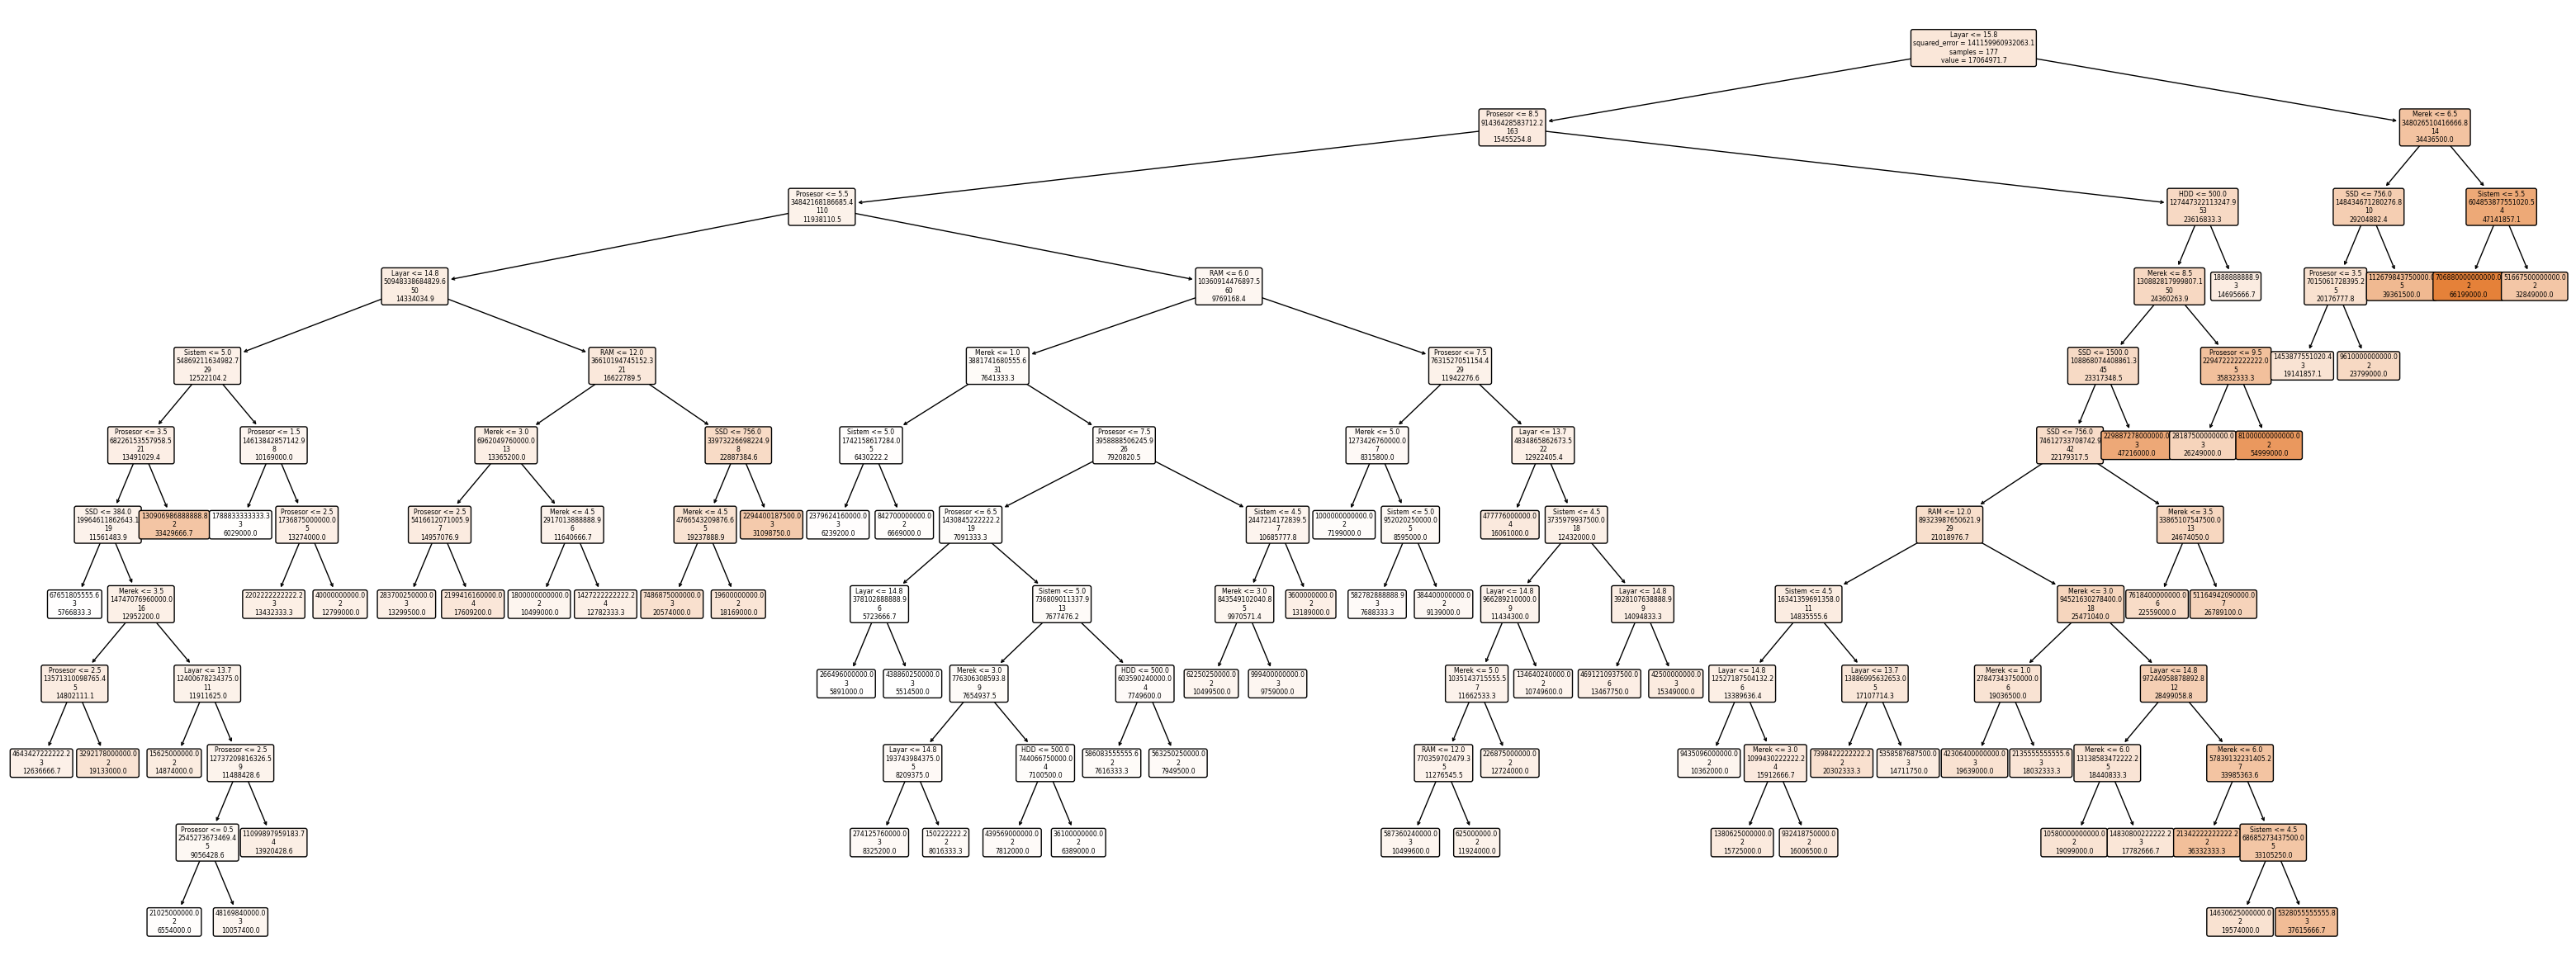

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,15))
tree1 = tree.plot_tree(regressor.estimators_[0], feature_names=X.columns, filled=True, rounded=True, precision=1, impurity=True, fontsize=5.6, label="root")

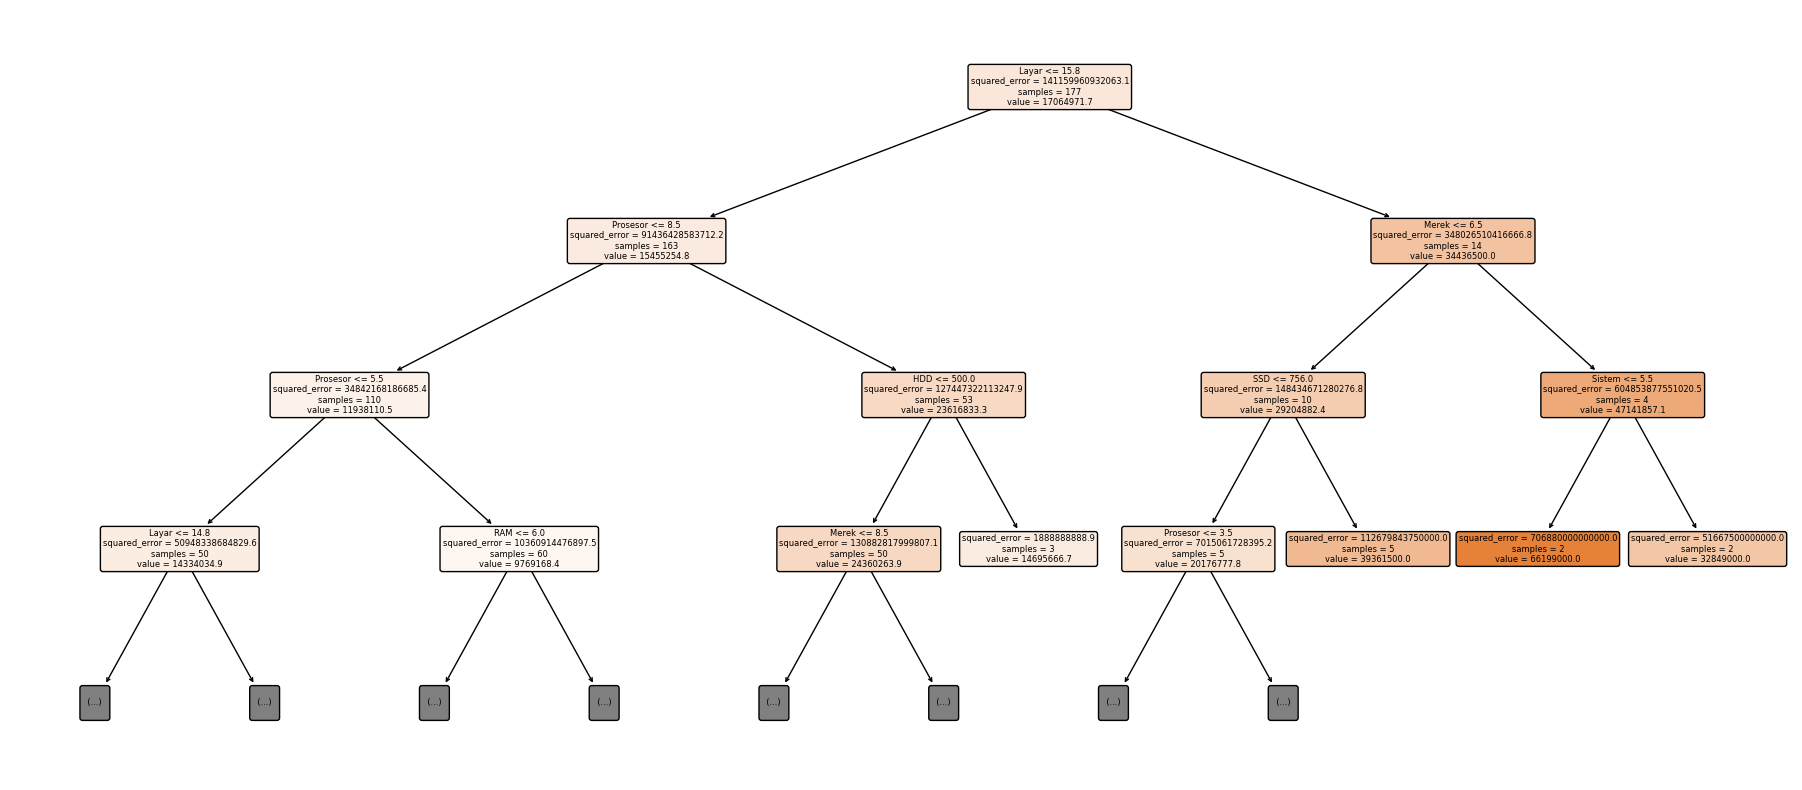

In [ ]:
plt.figure(figsize=(23,10))
tree1kcl = tree.plot_tree(regressor.estimators_[0], feature_names=X.columns, filled=True, rounded=True, precision=1, impurity=True, fontsize=6, max_depth=3)

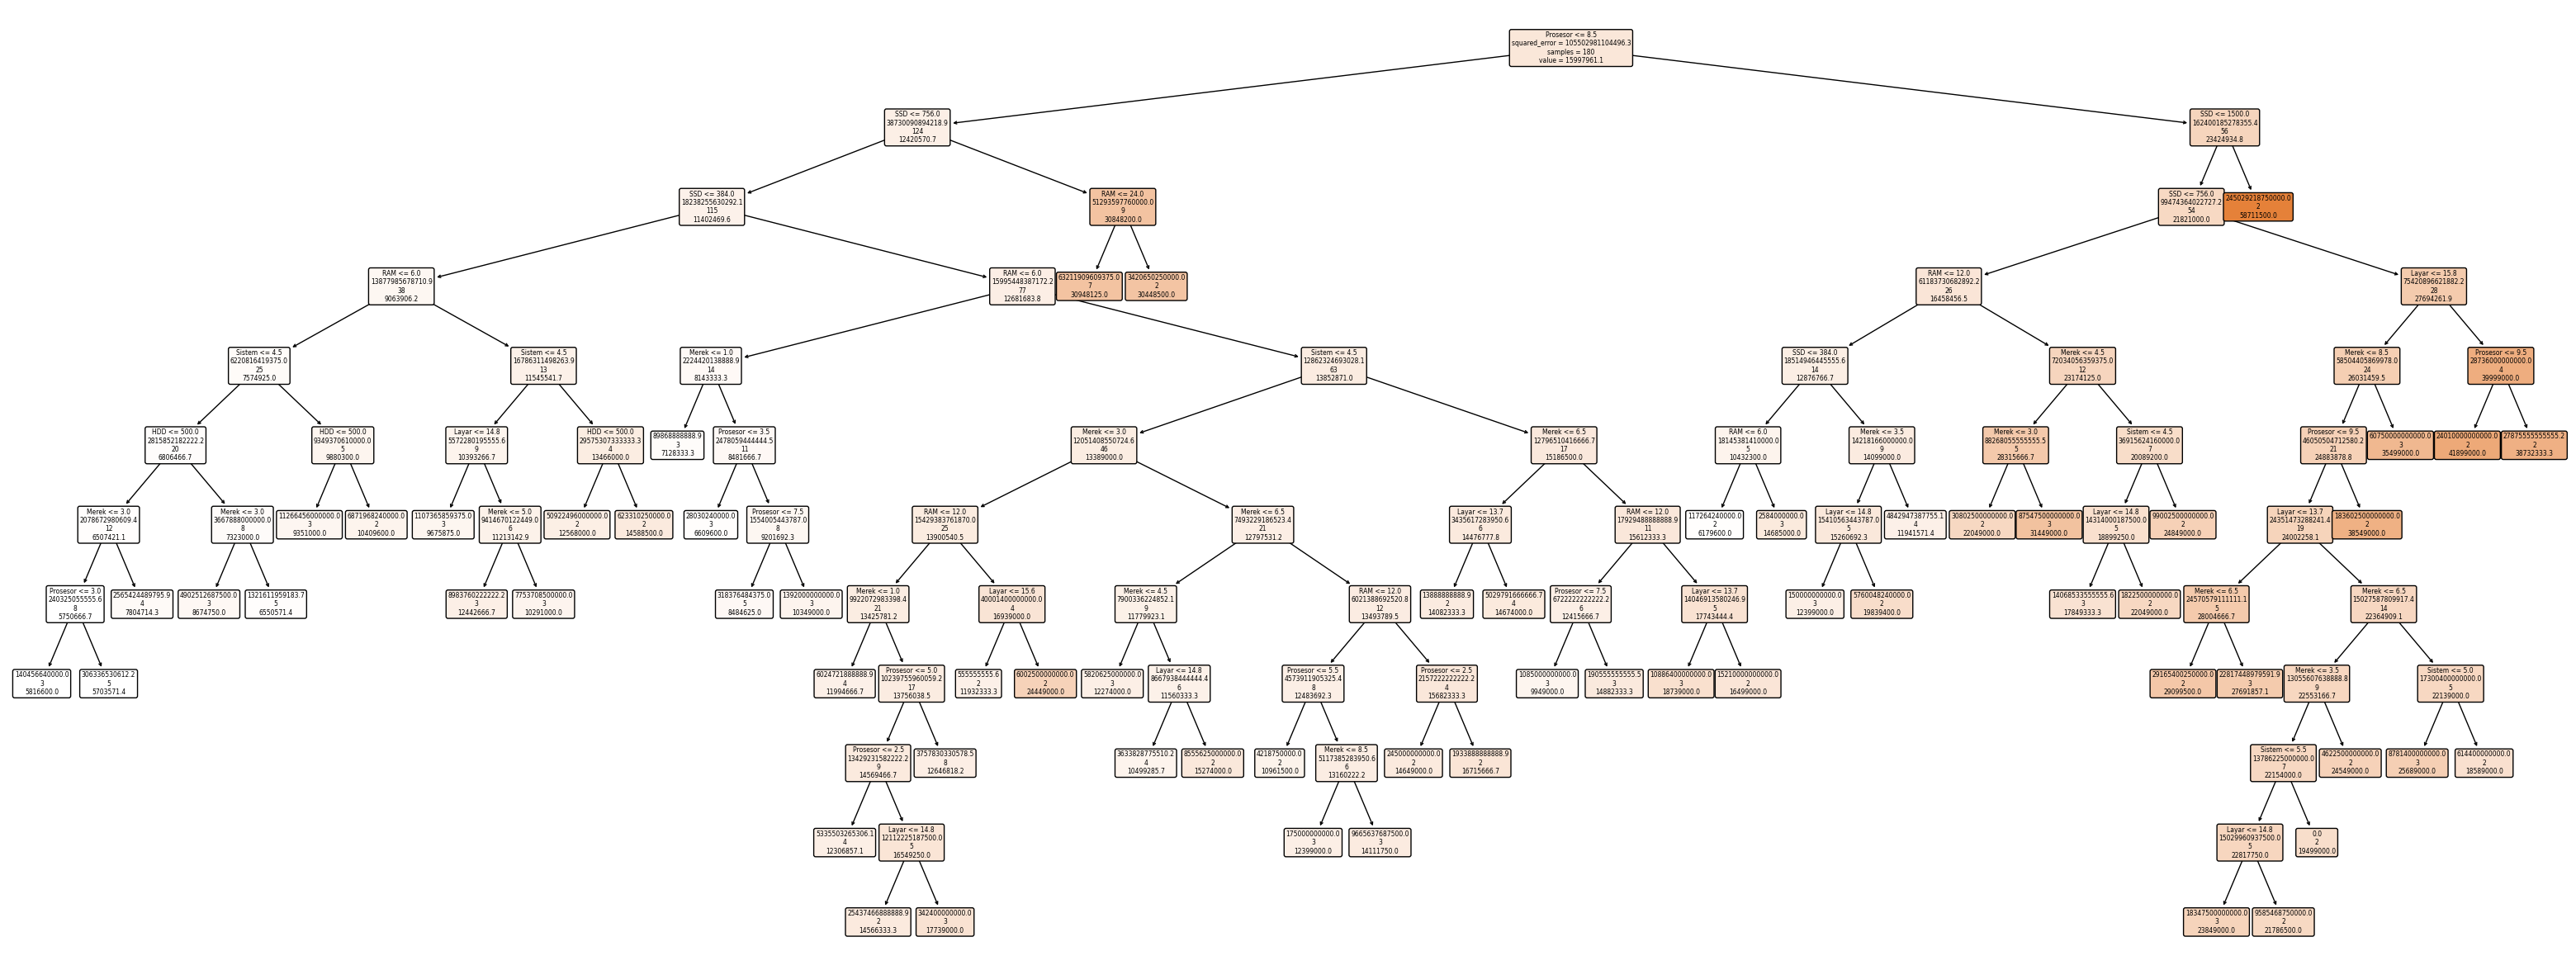

In [ ]:
plt.figure(figsize=(40,15))
tree2 = tree.plot_tree(regressor.estimators_[1], feature_names=X.columns, filled=True, rounded=True, precision=1, impurity=True, fontsize=5.5, label="root")

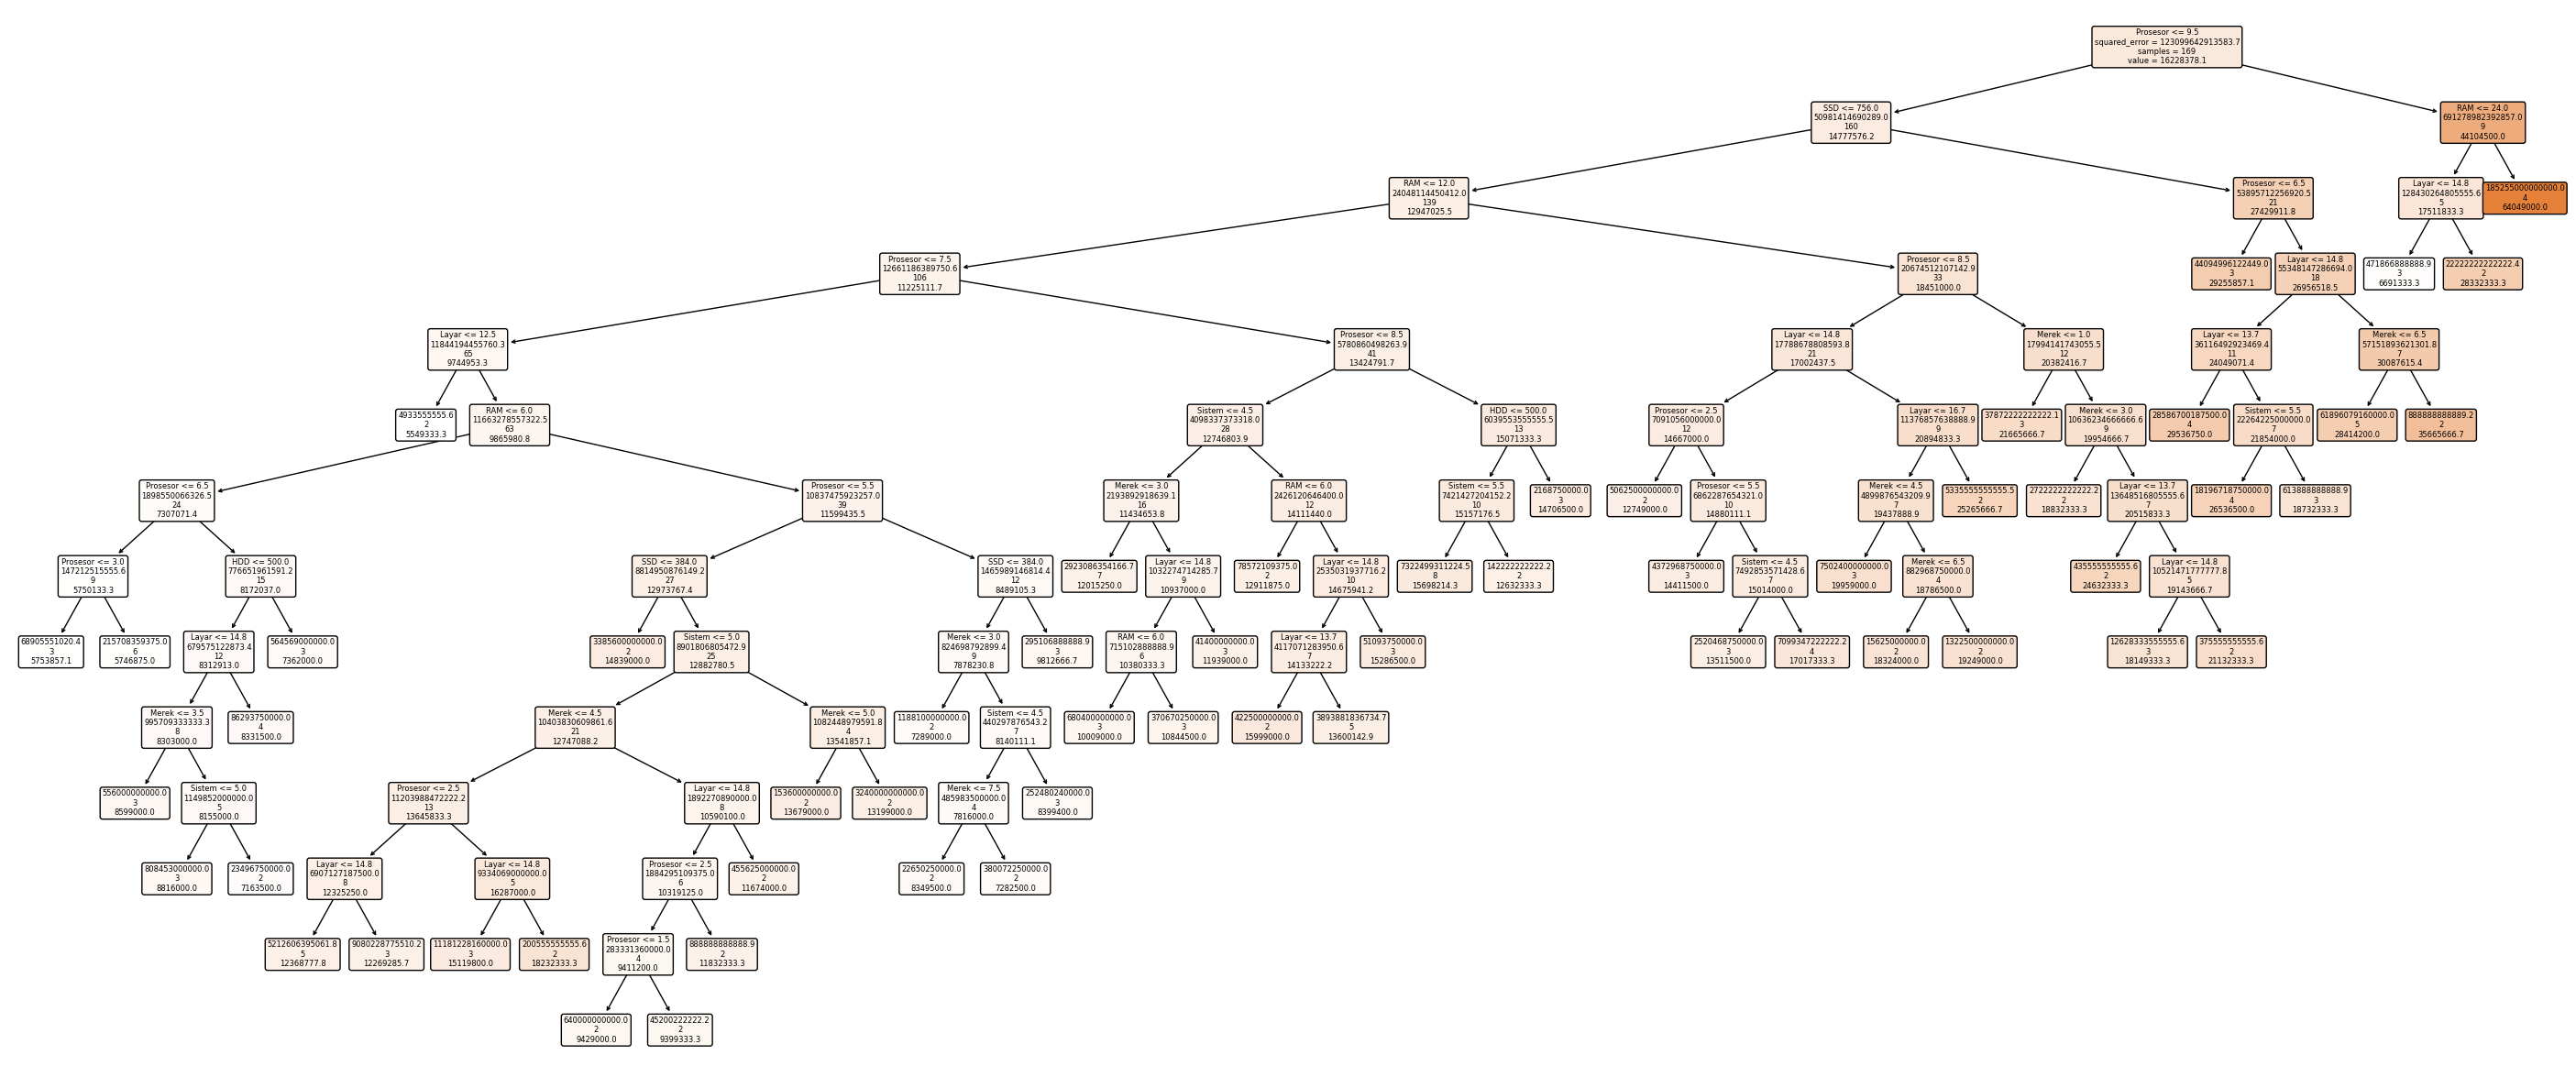

In [ ]:
plt.figure(figsize=(36,15))
tree3 = tree.plot_tree(regressor.estimators_[2], feature_names=X.columns, filled=True, rounded=True, precision=1, impurity=True, fontsize=6, label="root")

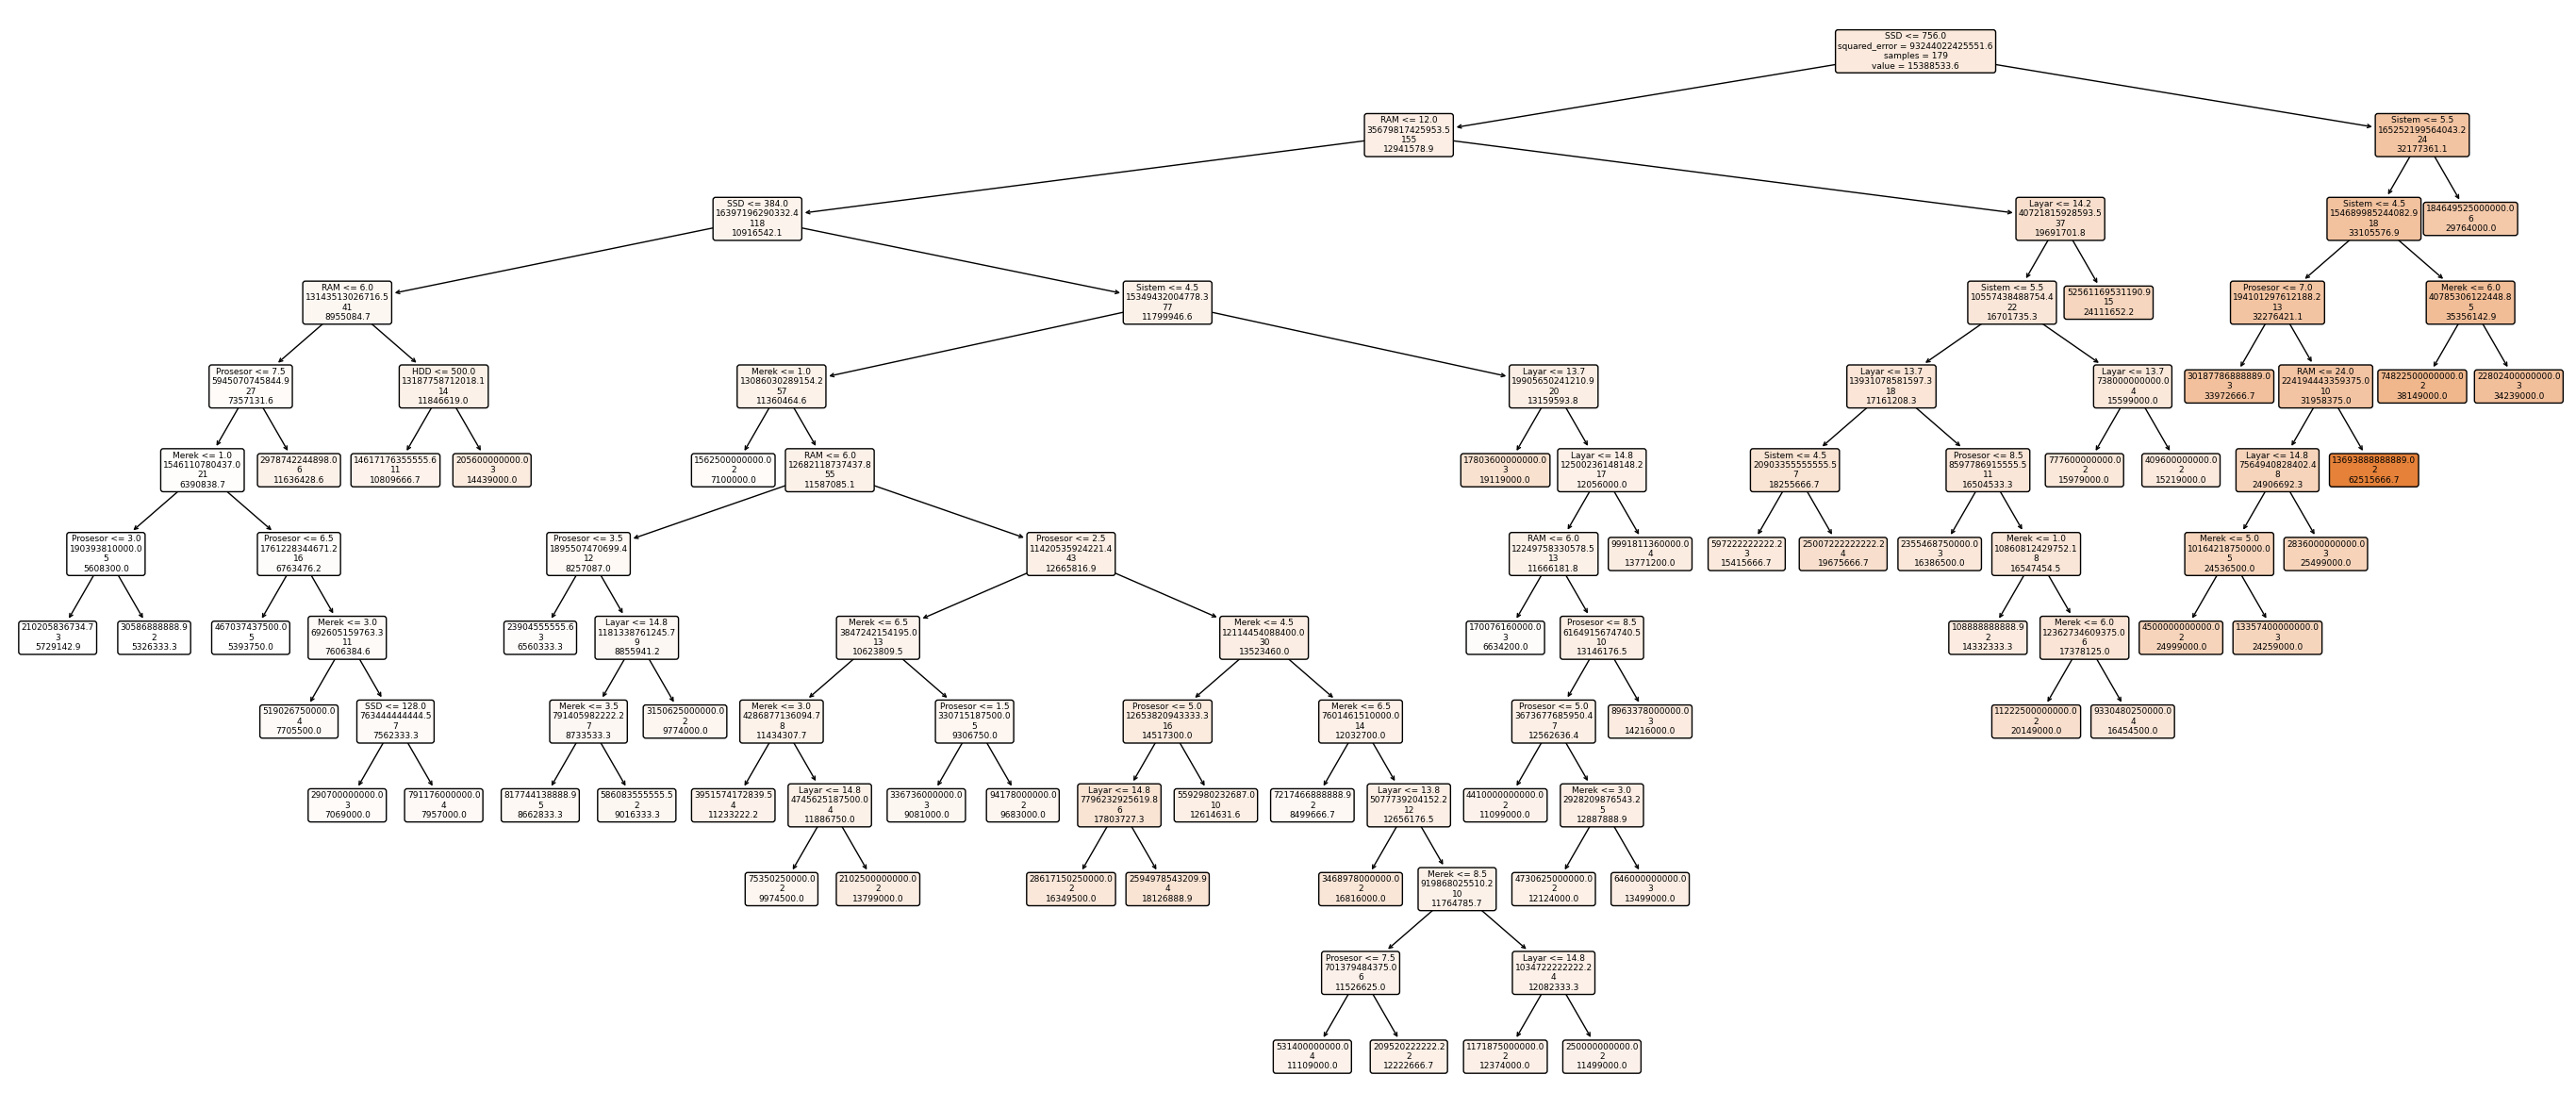

In [ ]:
plt.figure(figsize=(35,15))
tree398 = tree.plot_tree(regressor.estimators_[397], feature_names=X.columns, filled=True, rounded=True, precision=1, impurity=True, fontsize=6.5, label="root")

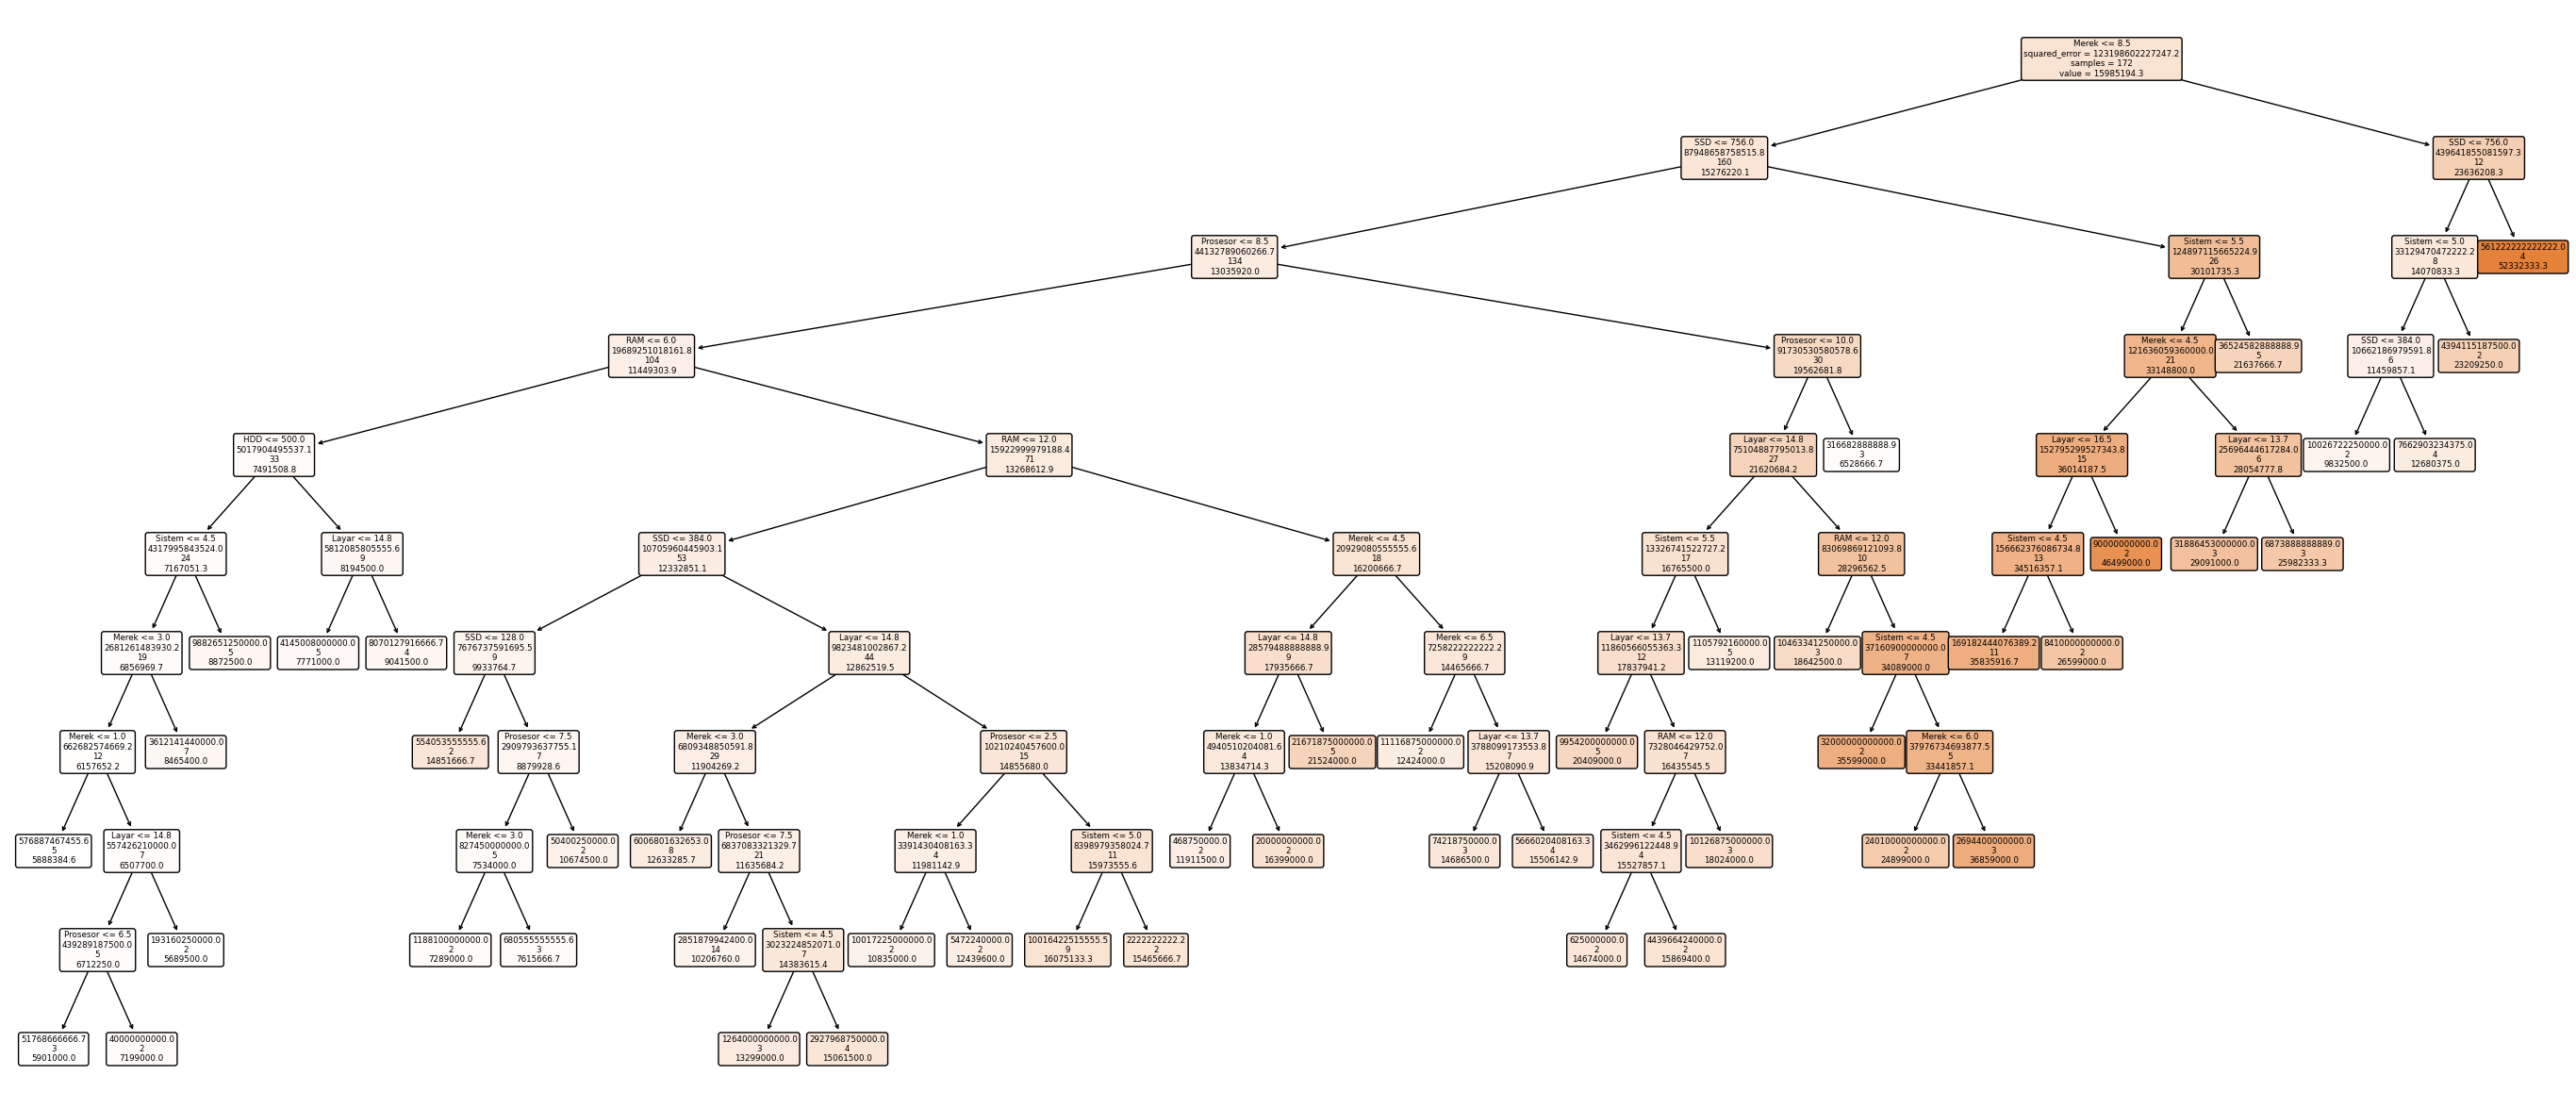

In [ ]:
plt.figure(figsize=(35,15))
tree399 = tree.plot_tree(regressor.estimators_[398], feature_names=X.columns, filled=True, rounded=True, precision=1, impurity=True, fontsize=6.3, label="root")

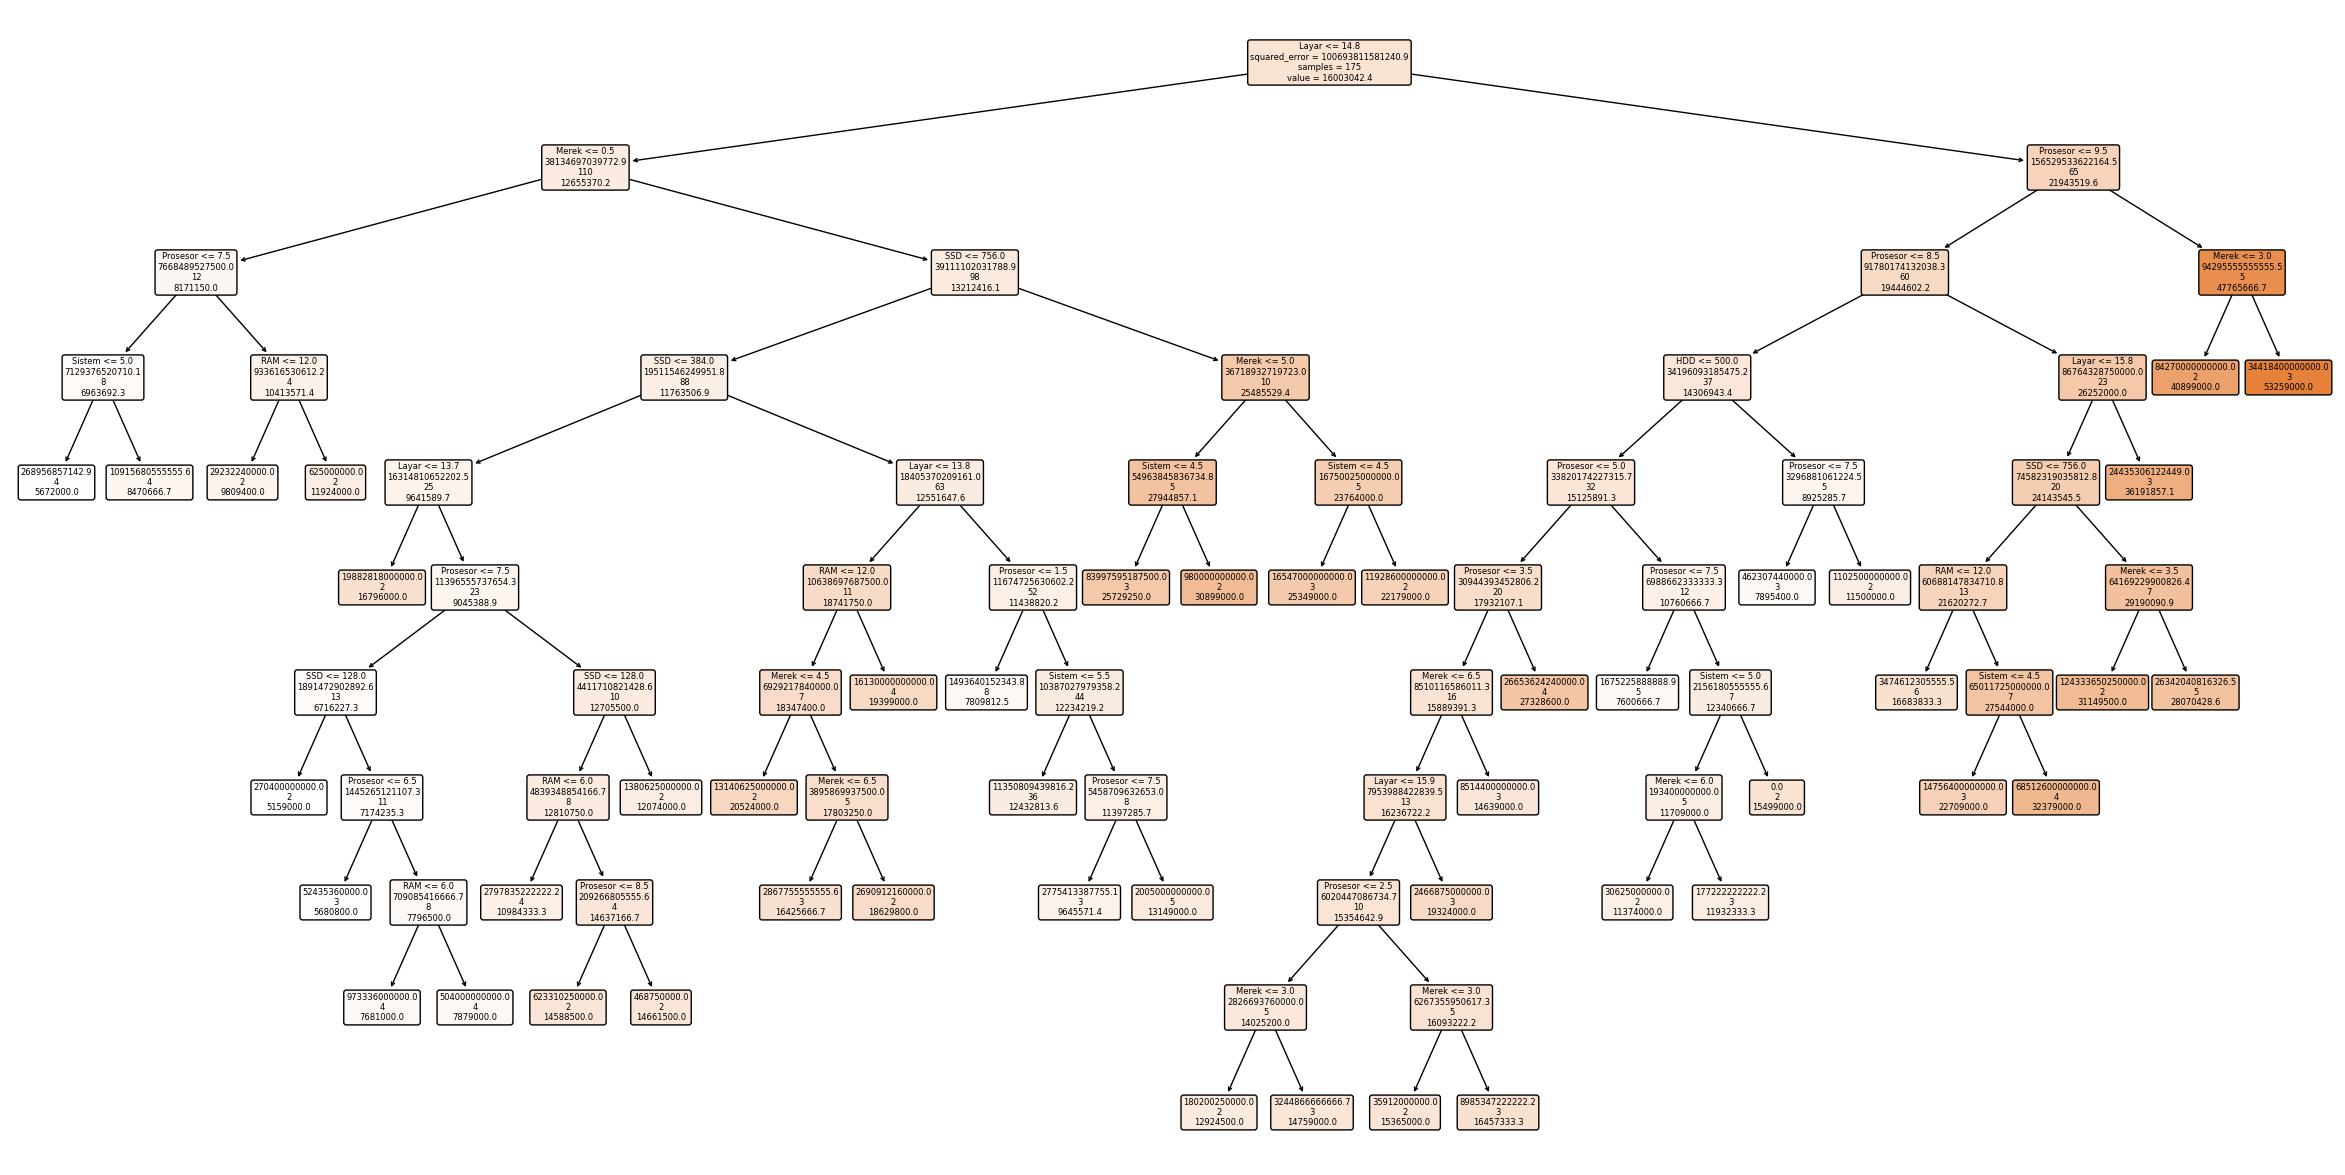

In [ ]:
plt.figure(figsize=(30,15))
tree400 = tree.plot_tree(regressor.estimators_[399], feature_names=X.columns, filled=True, rounded=True, precision=1, impurity=True, fontsize=6,label="root")

In [ ]:
A = y_test.values.reshape(-1,1)
B = y_pred.reshape(-1,1)

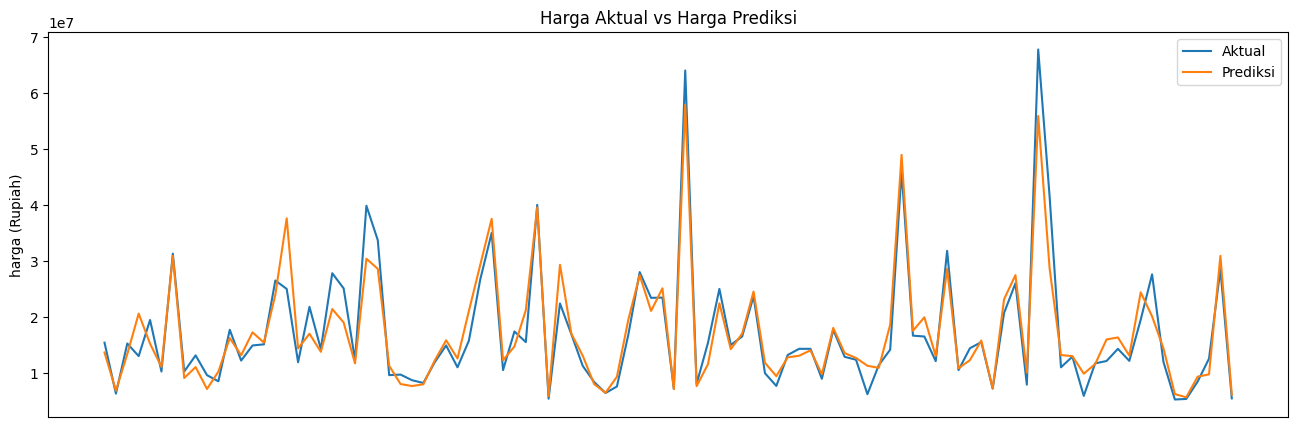

In [ ]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Aktual")
plt.plot(B[-100:], label="Prediksi")
plt.legend()
plt.title("Harga Aktual vs Harga Prediksi")
plt.ylabel("harga (Rupiah)")
plt.xticks(())
plt.show()

<Axes: ylabel='feature'>

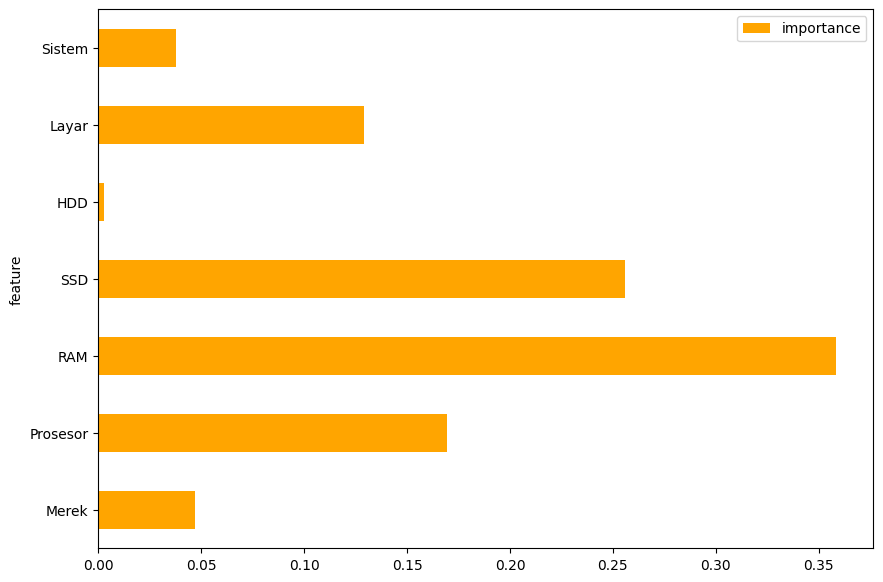

In [ ]:
features = list(X_train.columns)
feature_importances = pd.DataFrame({'feature': features, 'importance': regressor.feature_importances_})
feature_importances.plot(x='feature', y='importance', kind='barh', color="orange", figsize=(10,7))

In [ ]:
importance = np.round(regressor.feature_importances_,3)
importance_df = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_df

,Importance
Merek,0.047
Prosesor,0.169
RAM,0.359
SSD,0.256
HDD,0.003
Layar,0.129
Sistem,0.038


In [ ]:
!pip install pickle-mixin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=d29f50f3f60771e319ef4a7430e3b994122a098d21c0ff3c212e9228fdda312a
  Stored in directory: /root/.cache/pip/wheels/3e/c6/e9/d1b0a34e1efc6c3ec9c086623972c6de6317faddb2af0a619c
Successfully built pickle-mixin


In [ ]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [ ]:
print(np.round(model.predict([[0,9,4,512,0,15,6]])))

[14248788.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
rf_random_1 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=5)
rf_random_1.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]})

In [ ]:
print(pd.DataFrame(rf_random_1.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.845272      0.032777         0.054605        0.003866   
1       1.260941      0.251017         0.112599        0.095365   
2       1.502221      0.038052         0.075285        0.007399   
3       0.704153      0.162005         0.044425        0.007700   
4       1.851558      0.021097         0.096626        0.006334   
5       1.812606      0.324557         0.088897        0.021573   
6       1.308851      0.285006         0.068677        0.014815   
7       1.571619      0.039678         0.088982        0.002696   
8       2.081703      0.240337         0.103563        0.013683   
9       1.615178      0.352191         0.105448        0.024923   

  param_n_estimators param_min_samples_leaf param_max_features  \
0                600                      8                  1   
1                600                      2                  4   
2                800                      4                  7  

In [ ]:
rf_random_2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=5, n_iter=20)
rf_random_2.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_features': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]})

In [ ]:
print(pd.DataFrame(rf_random_2.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.800417      0.009548         0.045454        0.000851   
1        1.592667      0.350128         0.092658        0.025250   
2        0.484212      0.005500         0.026359        0.000794   
3        0.169321      0.006673         0.010590        0.000474   
4        0.148223      0.001257         0.010098        0.000310   
5        1.636029      0.353854         0.083310        0.016808   
6        1.012460      0.008062         0.063226        0.003632   
7        1.098880      0.262746         0.054591        0.012033   
8        1.727233      0.312691         0.088238        0.018551   
9        0.577294      0.128917         0.033673        0.001586   
10       0.154973      0.005116         0.012762        0.001372   
11       0.288237      0.006842         0.018821        0.000760   
12       0.707896      0.011209         0.047779        0.004025   
13       0.799359      0.171073         0.038523

In [ ]:
rf_random_3 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=10, n_iter=20)
rf_random_3.fit(X_train, y_train)
print(pd.DataFrame(rf_random_3.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.670788      0.014615         0.033505        0.003807   
1        1.111212      0.201625         0.049996        0.007536   
2        0.555402      0.134202         0.031295        0.009062   
3        1.726264      0.256358         0.085393        0.012954   
4        0.168554      0.002968         0.009647        0.000279   
5        1.508071      0.298573         0.064555        0.013293   
6        0.169870      0.038607         0.010800        0.002458   
7        1.287536      0.226686         0.055434        0.008522   
8        0.763845      0.014211         0.039210        0.001255   
9        0.488590      0.108976         0.023534        0.004557   
10       1.868358      0.248120         0.098406        0.016112   
11       1.344977      0.242433         0.068541        0.011721   
12       0.973521      0.178395         0.042273        0.005816   
13       0.335804      0.083861         0.020198